In [33]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
# Importing Dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [35]:
# Number of null values in every column
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


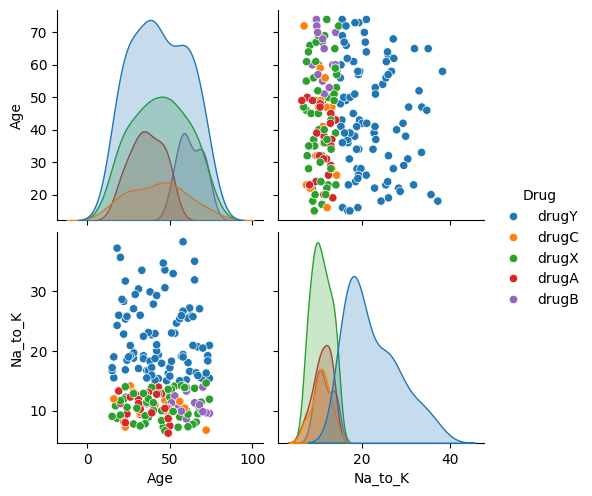

In [36]:
#
sns.pairplot(data,hue='Drug')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [38]:
X = pd.get_dummies(data.drop('Drug', axis=1), drop_first=True, dtype=int)
Y = data['Drug']
X.head()


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)


In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
Test_prediction = model.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay,classification_report

In [42]:
# Calculating the Accuracy of the model
accuracy_score(Y_test, Test_prediction)

0.9833333333333333

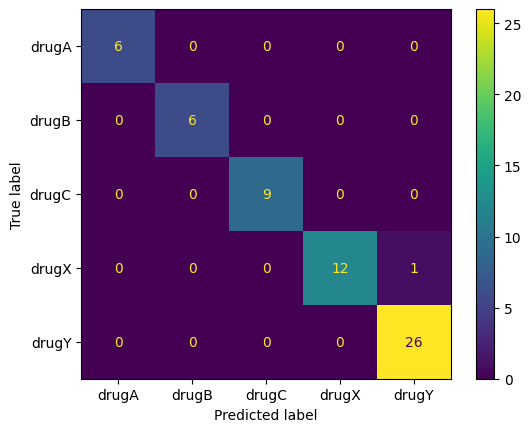

In [43]:
# Plotting the Confusion Matrix
confusion_matrix(Y_test,Test_prediction)
ConfusionMatrixDisplay.from_predictions(Y_test,Test_prediction)

In [44]:
print(classification_report(Y_test, Test_prediction))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



Adjusting Hyperparameters

In [45]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature importance']).sort_values('Feature importance')

,Feature importance
Sex_M,0.000000
Cholesterol_NORMAL,0.093384
BP_LOW,0.125818
Age,0.132994
BP_NORMAL,0.141509
Na_to_K,0.506297


[Text(0.75, 0.9, 'Na_to_K <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [17, 10, 7, 41, 65]'),
 Text(0.625, 0.7, 'BP_NORMAL <= 0.5\ngini = 0.623\nsamples = 75\nvalue = [17, 10, 7, 41, 0]'),
 Text(0.5, 0.5, 'BP_LOW <= 0.5\ngini = 0.725\nsamples = 46\nvalue = [17, 10, 7, 12, 0]'),
 Text(0.25, 0.3, 'Age <= 50.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.3, 'Cholesterol_NORMAL <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [0, 0, 7, 12, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]')]

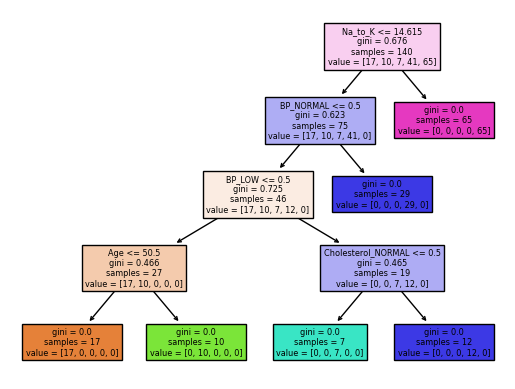

In [46]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns, filled=True)

In [49]:
def Model_Reports(model):
    model_prediction= model.predict(X_test)
    print(classification_report(Y_test, model_prediction))
    accuracy_score(Y_test, model_prediction)
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60





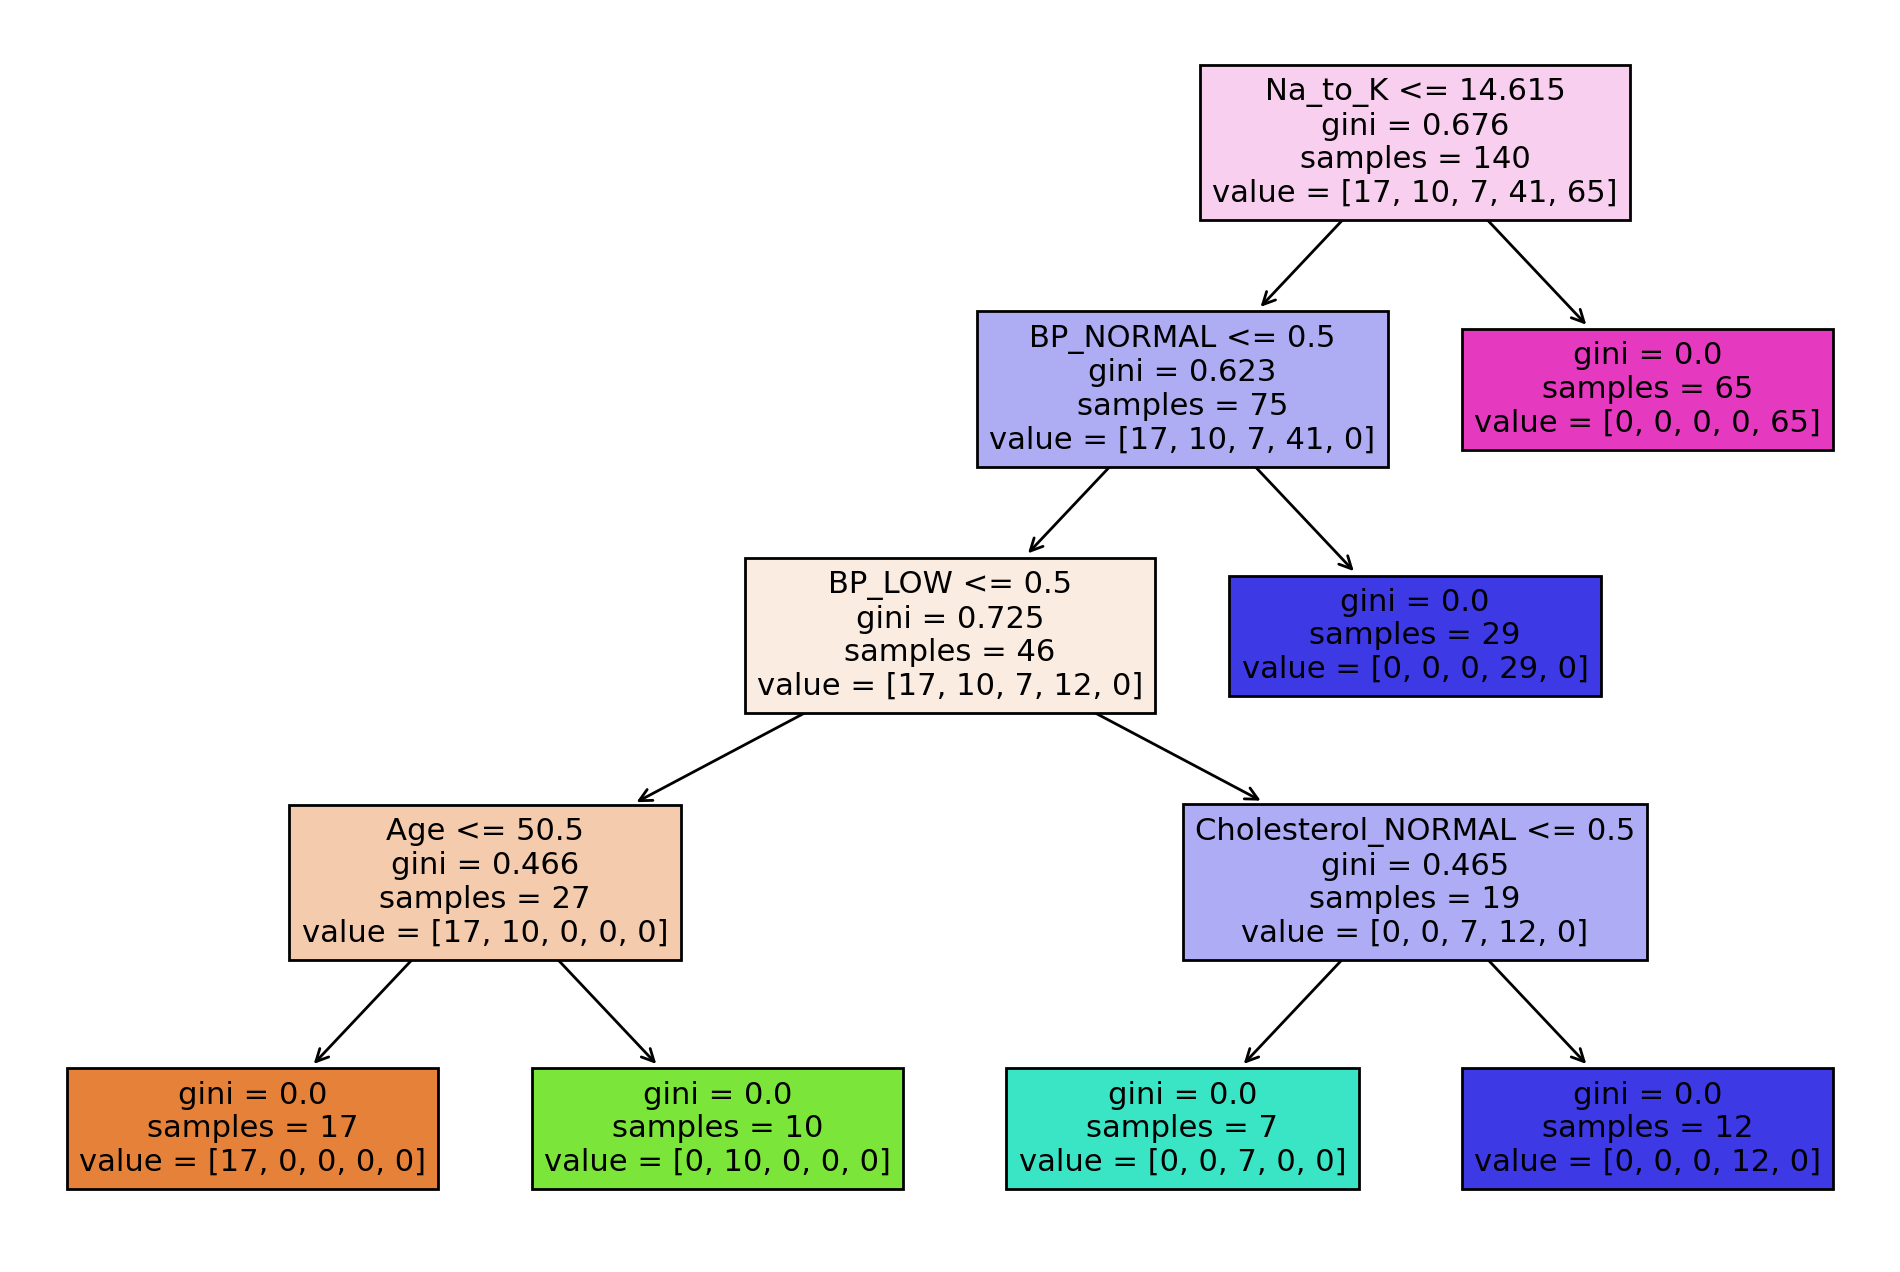

In [50]:
Model_Reports(model)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60





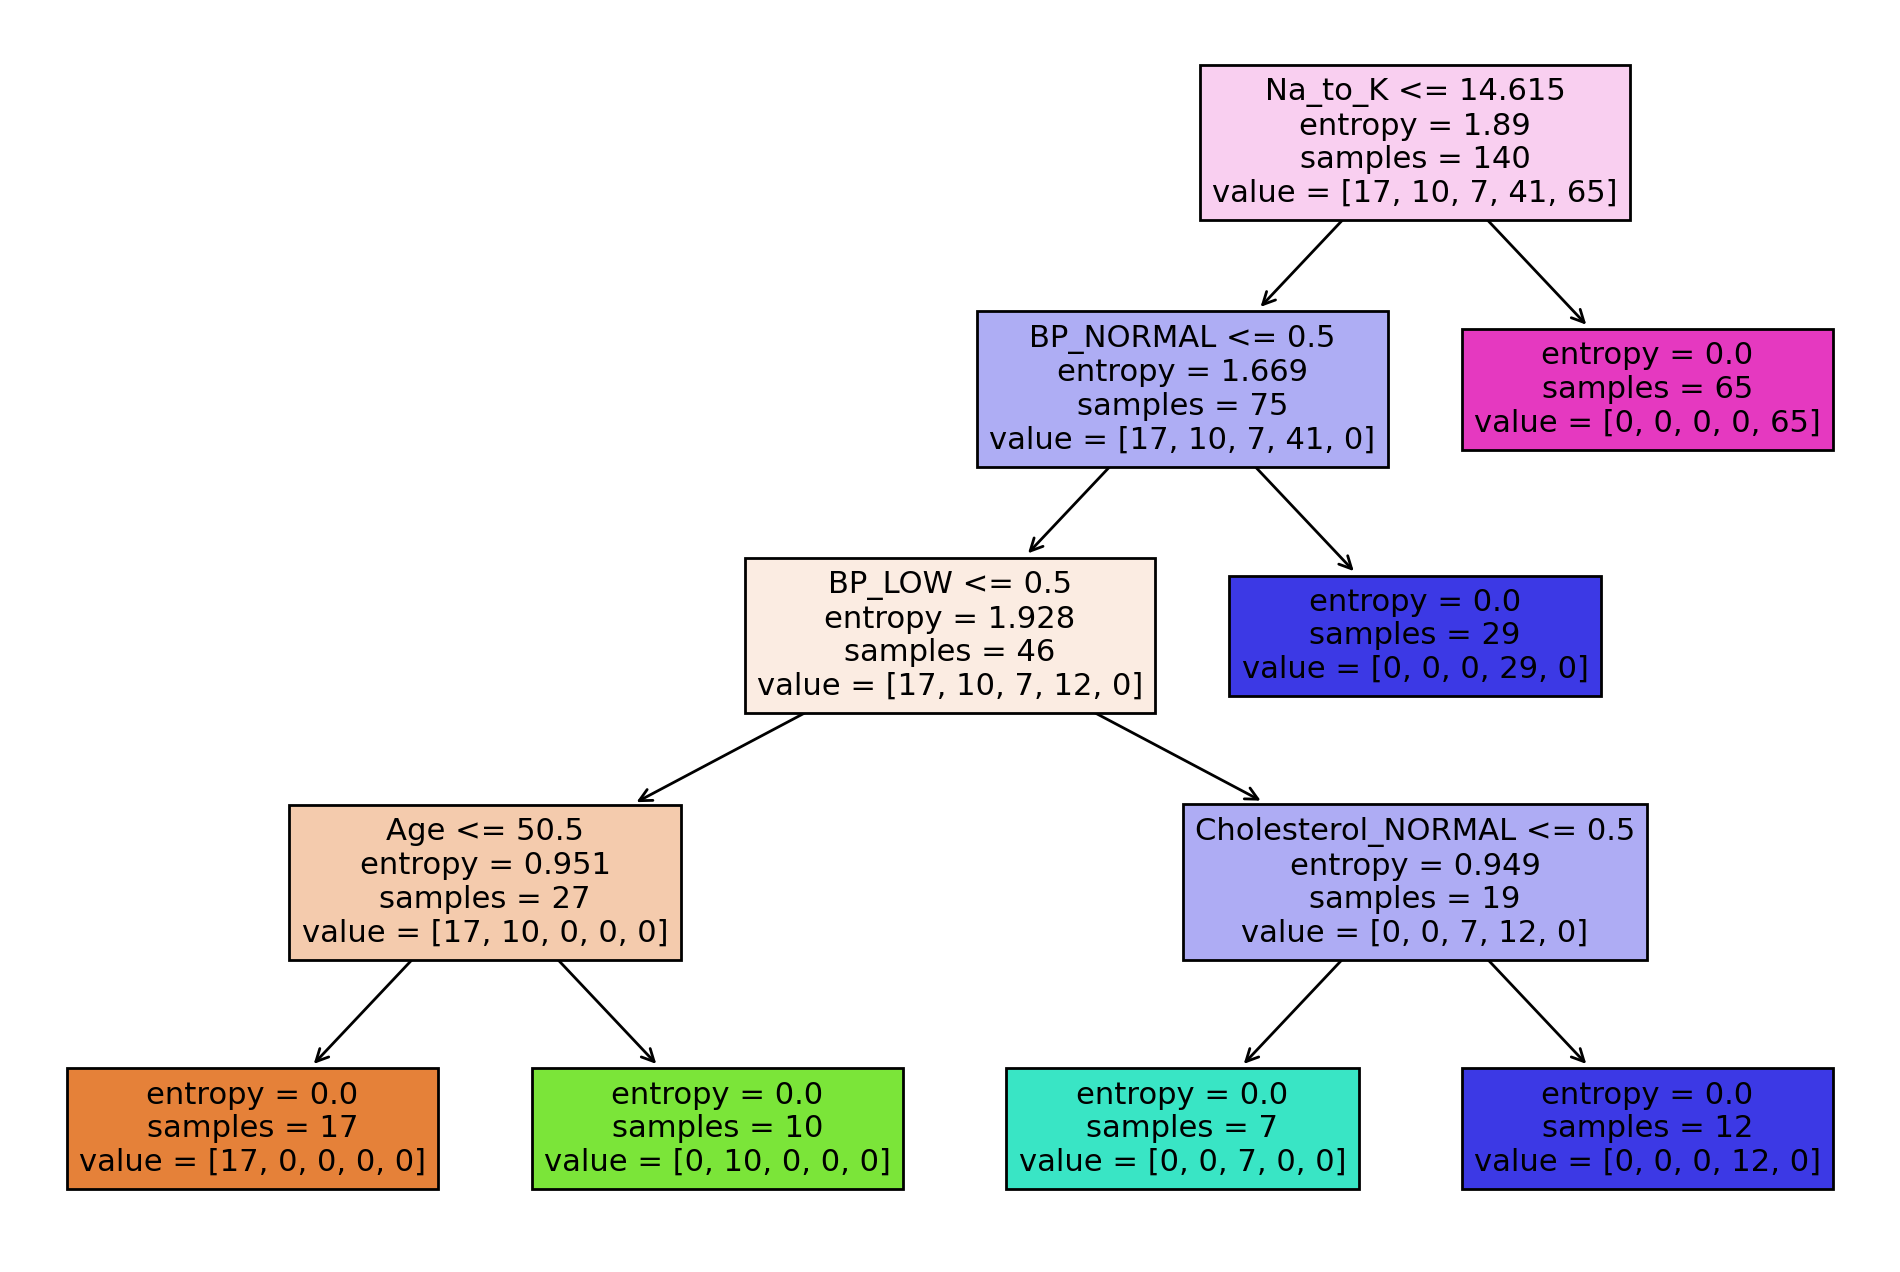

In [54]:
entropy_model = DecisionTreeClassifier(criterion='entropy')
entropy_model.fit(X_train, Y_train)
Model_Reports(entropy_model)